# Communicate Data Finding Exploration For ` Ford-GoBike-System-Data`
## Gunja Chotai

## Table of Contents
- Structure of dataset
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration

## Overview
- Here I selected for exploration data from Ford GoBike System Data: https://www.fordgobike.com/system-data as data source. 
- Data source includes information about a bike-sharing system which is provided in the San Francisco Bay area.
- I discuss What are the factore affect most during the trip.

In [2]:
# import packages and setting plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

# import for ignore warnings from output
import warnings
warnings.simplefilter("ignore")

In [3]:
#get data from zip.csv file and comible as one data source
# prepare directory path for get data from zip.csv file 
dir = os.getcwd()
path = dir + '/fordgobike/'
all_files_lst = os.listdir(path)

# prepare dataset from diffrent csv file into single dataset
file_list = []
print ("reading data... ")
for file in all_files_lst:
    filename = path + file
    df = pd.read_csv(filename)
    file_list.append(df)
df_bike = pd.concat(file_list) 
df =  df_bike.copy()   
df.shape

reading data... 


(1863721, 14)

## Structure of dataset

- There are 18,63,721 row in 14 column in data set  of ford go bike

- In this dataset column name is duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, bike_share_for_all_trip. there are 6 numerical,2 datetime and 6 object type.

###  Feature's of interest in given dataset

- Here I can find out that most interested in ford go bike trip dataset duration is dependent on mainly duration_sec,start_time and user_type from the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- I expect that trip duration will have the strongest effect on each the start stations and end stations becouse the crowded places should receive more rides. I also think that user_type will have effects on trip duration.

In [4]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


## Univariate Exploration
- Univariate exploration means take single variable show effect of that variable on dataset. 

<b>Find maximum number of trip taken for how much duration?</b>

Text(0, 0.5, 'Frequency')

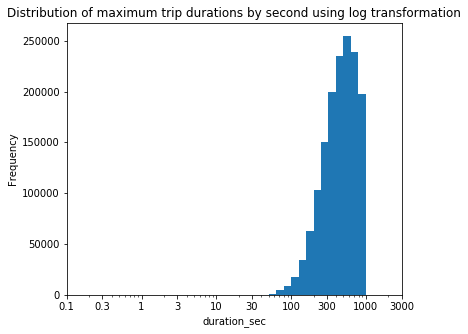

In [5]:
#set bin size
bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,1000,3000]
labels = ['{}'.format(v) for v in ticks]
#set plot feature
plt.figure(figsize=[6, 5])
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('duration_sec');
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Distribution of maximum trip durations by second using log transformation')
plt.ylabel('Frequency')

<b>Conclusion:</b> 
- We can see from the distribution , the trip duration of most users is about 10 mins

## Bivariate Exploration
- Bivariate Exploration means to investigate data relationships between pairs of variables in to dataset.

<b>Find month wise affect on to the trip duration</b>

Text(0, 0.5, 'Trip Duration(sec)')

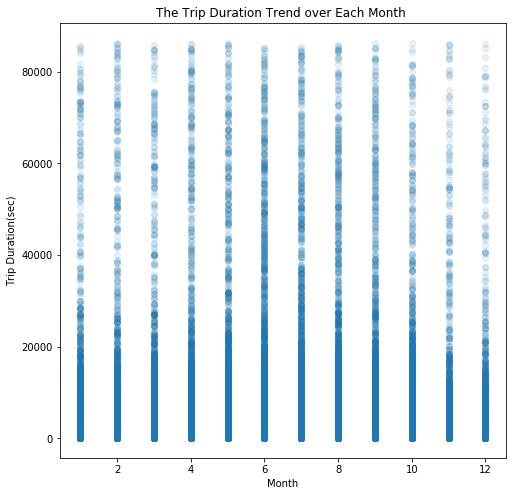

In [6]:
df['month_start'] = pd.DatetimeIndex(df['start_time']).month
# We can check the trip duration over changes over each month.
plt.figure(figsize = [8,8]) # make the whole figure bigger to show all 
plt.scatter(data = df , x = 'month_start' , y = 'duration_sec' , alpha = 0.1 );
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(sec)')

<b>Conclusion:</b> 
- From above chart I can say that From June to Auguts in 2018 has the most trip held for longest duration. Other month have not significant difference.

<b>Find How's effect of season on trip duration?</b>

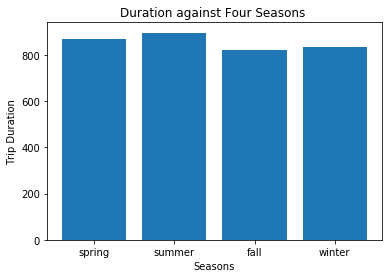

In [7]:
# Create 4 season categories
spring_dur = df.query('month_start in ["3" , "4" , "5"]' ).duration_sec.mean ()
summer_dur = df.query('month_start in ["6" , "7" , "8"] ').duration_sec.mean()
fall_dur = df.query('month_start in ["9" , "10" , "11"] ').duration_sec.mean()
winter_dur = df.query('month_start in ["12" , "1" , "2"]' ).duration_sec.mean()

plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

<b>Conclusion:</b> 
- From above chart We can analyse that summer has the longest trip duration,almost average 15 mins.
- But we can't find more significant difference of trip duration all four seasons. because the weather of bay area is almost same for the whole year.
- Here lowest trip duration in 2018 occure in fall. And Fall is most likely to season and pleasent atmospher  but i think in this season mostly people enjoy to go out side of city or else do exercise at gym.

## Multivariate Exploration
- Prepare chart using three or more variables to investigate your data from dataset.

<b>Find Trip duration relation against month and user type</b>

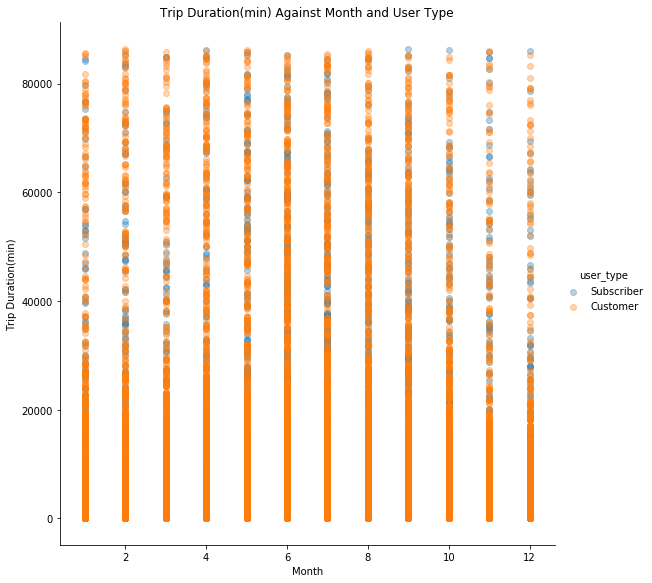

In [8]:
# set plot feature
g = sb.FacetGrid(data =  df, hue = 'user_type', size = 8)
g.map(plt.scatter, 'month_start','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

<b>Conclusion:</b> 
- As we can see from above chart, there are most of user type as customers take trip rather than subscribers.so we can predict that user type didnt make any diffrence for trip duration.
- According to above chart one thing is final that mostly subscribers take bike on rent for long trip like more than 300 minutes. And normal user can take bike rent for an average 100 minute.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!